# T1.0 — Exploration des données IMDB
Objectif : analyser la qualité et la structure des données IMDB avant de créer le schéma relationnel.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os


## 1. Chargement des fichiers CSV
Les fichiers sont chargés depuis `data/csv/`.  
Une fonction de nettoyage est appliquée pour corriger les entêtes contenant des parenthèses.


In [32]:
os.listdir("csv")


['characters.csv',
 'directors.csv',
 'genres.csv',
 'knownformovies.csv',
 'movies.csv',
 'persons.csv',
 'principals.csv',
 'professions.csv',
 'ratings.csv',
 'titles.csv',
 'writers.csv']

In [33]:
movies = pd.read_csv("csv/movies.csv", sep=",")
persons = pd.read_csv("csv/persons.csv", sep=",")
characters = pd.read_csv("csv/characters.csv", sep=",")
directors = pd.read_csv("csv/directors.csv", sep=",")
genres = pd.read_csv("csv/genres.csv", sep=",")
principals = pd.read_csv("csv/principals.csv", sep=",")
ratings = pd.read_csv("csv/ratings.csv", sep=",")
titles = pd.read_csv("csv/titles.csv", sep=",")
writers = pd.read_csv("csv/writers.csv", sep=",")
known = pd.read_csv("csv/knownformovies.csv", sep=",")
professions = pd.read_csv("csv/professions.csv", sep=",")


def clean_columns(df):
    df.columns = df.columns.str.replace("[()']", "", regex=True).str.replace(",", "", regex=True).str.strip()
    return df

movies = clean_columns(movies)
persons = clean_columns(persons)
characters = clean_columns(characters)
directors = clean_columns(directors)
genres = clean_columns(genres)
principals = clean_columns(principals)
ratings = clean_columns(ratings)
titles = clean_columns(titles)
writers = clean_columns(writers)
known = clean_columns(known)
professions = clean_columns(professions)


## 2. Statistiques descriptives
Pour chaque table :  
- dimensions  
- types des colonnes  
- valeurs manquantes  
- chaînes vides  
- nombre de valeurs uniques


In [34]:
datasets = {
    "movies": movies,
    "persons": persons,
    "characters": characters,
    "directors": directors,
    "genres": genres,
    "principals": principals,
    "ratings": ratings,
    "titles": titles,
    "writers": writers,
    "known": known,
    "professions": professions
}

for name, df in datasets.items():
    print(f"\n===== {name.upper()} =====")
    print("Taille (lignes, colonnes) :", df.shape)

    print("\nTypes de données :")
    print(df.dtypes)

    print("\nValeurs manquantes (NaN) :")
    print(df.isna().sum())

    print("\nChaînes vides :")
    print((df == "").sum())

    print("\nValeurs uniques :")
    print(df.nunique())

    print("\n----------------------------------------------")



===== MOVIES =====
Taille (lignes, colonnes) : (36859, 8)

Types de données :
mid                object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int64
endYear           float64
runtimeMinutes    float64
dtype: object

Valeurs manquantes (NaN) :
mid                   0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
endYear           36859
runtimeMinutes       40
dtype: int64

Chaînes vides :
mid               0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
dtype: int64

Valeurs uniques :
mid               36859
titleType             1
primaryTitle      34406
originalTitle     35206
isAdult               1
startYear           111
endYear               0
runtimeMinutes      223
dtype: int64

----------------------------------------------

===

## 3. Analyses exploratoires
### 3.1 Distribution des films par année


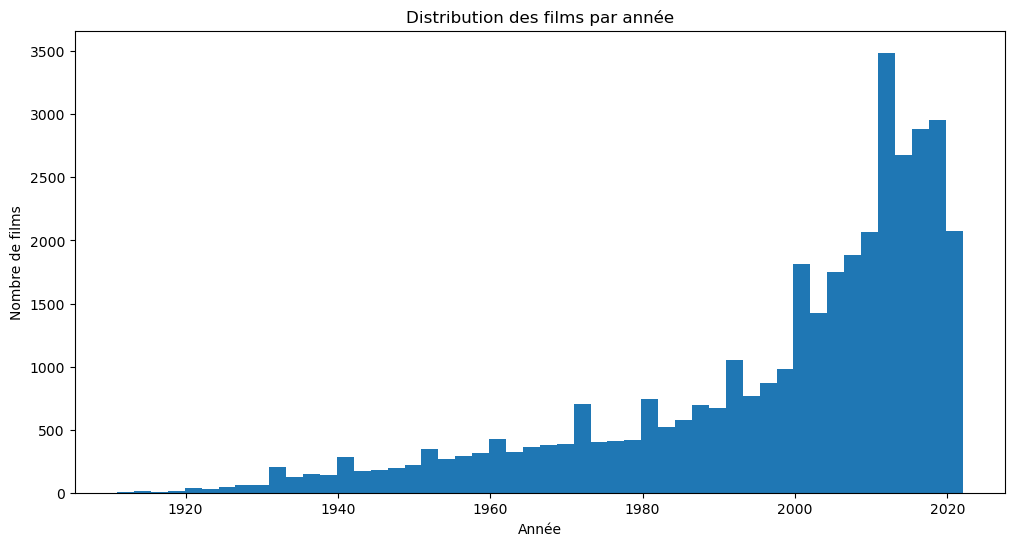

In [35]:
years = pd.to_numeric(movies["startYear"], errors="coerce").dropna()

plt.figure(figsize=(12,6))
plt.hist(years, bins=50)
plt.title("Distribution des films par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.show()


### 3.2 Top 10 des genres les plus fréquents


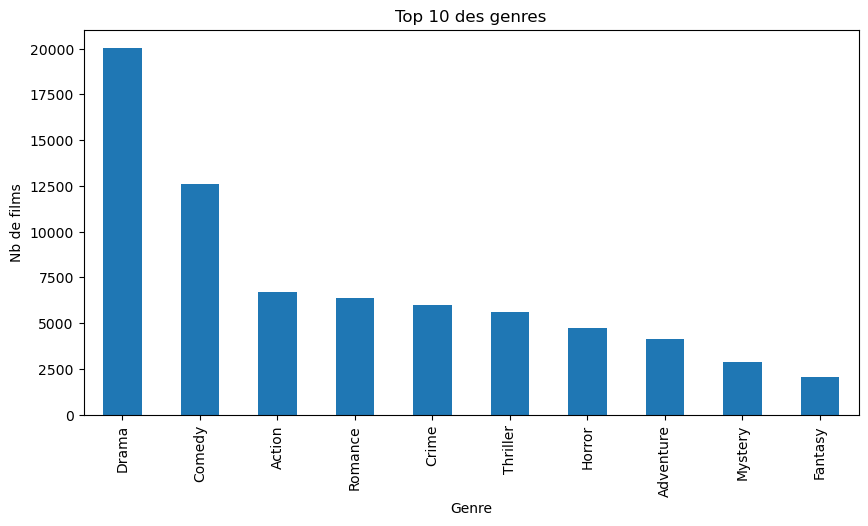

In [36]:
top_genres = genres["genre"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind="bar")
plt.title("Top 10 des genres")
plt.xlabel("Genre")
plt.ylabel("Nb de films")
plt.show()


### 3.3 Distribution des notes IMDB


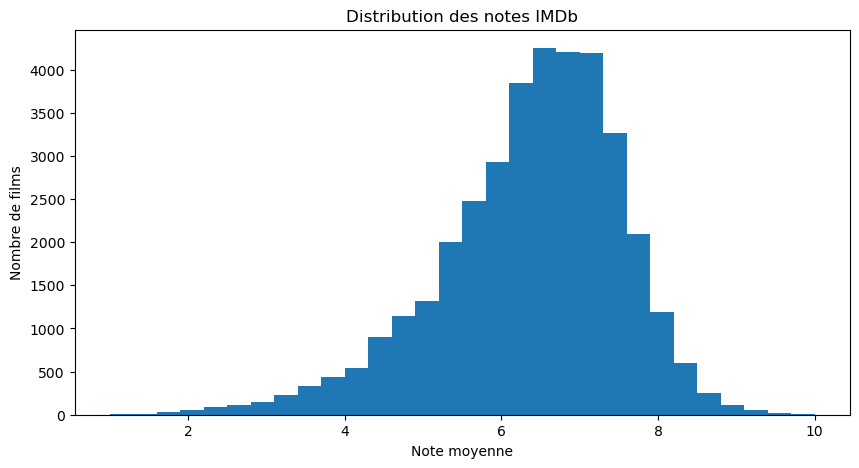

In [46]:
# Conversion en numérique
ratings["averageRating"] = pd.to_numeric(ratings["averageRating"], errors="coerce")

# Histogramme propre et cohérent
plt.figure(figsize=(10,5))
plt.hist(ratings["averageRating"].dropna(), bins=30)
plt.title("Distribution des notes IMDb")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()


### 3.4 Nombre moyen d'acteurs par film


In [38]:
actors_only = principals[principals["category"].isin(["actor", "actress"])]

actors_per_movie = actors_only.groupby("mid")["pid"].nunique().mean()
actors_per_movie


np.float64(4.03832260977537)

### 3.5 Distribution du nombre d'acteurs par film


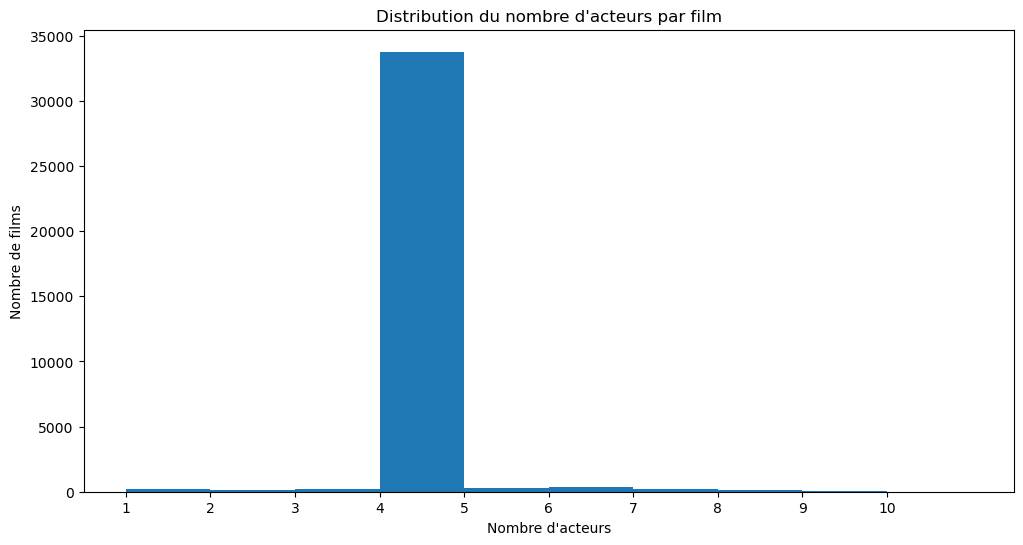

In [39]:
actor_counts = actors_only.groupby("mid")["pid"].nunique()

plt.figure(figsize=(12,6))
plt.hist(actor_counts, bins=range(1, actor_counts.max()+2))
plt.title("Distribution du nombre d'acteurs par film")
plt.xlabel("Nombre d'acteurs")
plt.ylabel("Nombre de films")
plt.xticks(range(1, actor_counts.max()+1))
plt.show()


## 4. Relations entre tables (intégrité des clés)


In [40]:
missing_movies = set(principals["mid"]) - set(movies["mid"])
missing_movies


set()

In [41]:
missing_persons = set(principals["pid"]) - set(persons["pid"])
missing_persons


{'nm0706571', 'nm10893293', 'nm13465907', 'nm13465909', 'nm13465910'}

In [42]:
len(missing_movies), len(missing_persons)


(0, 5)

In [43]:
movies_without_principals = set(movies["mid"]) - set(principals["mid"])
len(movies_without_principals)


0

In [44]:
persons_unused = set(persons["pid"]) - set(principals["pid"])
len(persons_unused)


950

## 5. Résumé de l'exploration
- Les données IMDB-small ont été chargées et nettoyées.
- La majorité des films sont produits après 1990.
- Les genres les plus fréquents sont Drama, Comedy et Action.
- La note IMDb la plus fréquente est autour de 6.
- Un film comporte en moyenne ~4 acteurs principaux.
- L’intégrité des clés est globalement bonne (0 films orphelins, 5 personnes manquantes).
